# Survey Data

The raw SCF survey data can be accessed from either the "Full Public Data Set" or the "Summary Extract Public Data" datasets. The only difference between the two is that the Extract dataset contains fewer variables, and the variable names were re-defined to make them a little bit more user friendly (e.g. total income = 'X5729' in the Full dataset and = 'income' in the Extract dataset). There are also a number of variables in the Extract dataset that were constructed from various variables in the Full dataset. For example the Extract dataset variable 'networth' doesn't appear in the Full dataset, but all the individual components required to construct 'networth' does.

There IS a big difference between the codebooks for the two datasets, though. The [Full dataset codebook](http://www.federalreserve.gov/econresdata/scf/files/codebk2013.txt) is 45,000 lines of text, which can make it absurdly difficult to find what you're looking for-- especially if you're only looking for variable names or definitions. The [Extract dataset codebook](http://sda.berkeley.edu/data/scfcomb2013/Doc/hcbk.htm) is hosted by UCal Berkeley and is much, much easier to work with. 

Here are some tips/hints that should save you a lot of time. All of this info is in the codebook, the problem is finding it buried in the 45,000 lines of text.

* ### ***J-codes vs. X-codes:***

   Every question from the SCF survey (post 1989) is tabulated and given a code that begins with 'X'. For example, total income is coded as X5729 in the Full dataset and 'highest level of education completed by the head of household' is X5901.
    
   You'll also notice that each X-code has a corresponding J-code in the Full dataset (e.g. X5729 vs. J5729). The J-codes are essentially flags, and give additional information as to whether a particular observation/variable combo was altered/imputed/missing/etc.
    
   *Search for 'Definitions of the "J" Variables' in the main codebook to find the J-code definitions*
    
   *Search for 'LIST OF VARIABLES' in the  main codebook to find definitions of the various X-codes*
   
   ***Note: no J-codes for survey years before 1992. Variable names for these datasets start with a 'b' rather than 'X'. ***
    

* ### ***Weights:***

   In order to make the ~5,000 households covered by the survey more representative of the ~125 million total households in America, each observation receives a weight. The weight is supposed to estimate how many households each observation in the dataset is supposed to represent. e.g. a weight of 1,050 implies that that particular household is estimated to be representative of 1,050 households in the US during that particular year.  
    
   In the Full dataset, the weight variable is X42001. In the Extract dataset, the weight variable is 'wgt'.
   
   These weights complicate things like determining standard errors or running regressions (apparently). There's a lot of info on this in the Full Dataset codebook. There's a dataset called "Replicate Weight Files" on the SCF website that is designed to help determine standard errors/confidence intervals/etc. 
    
   ***Note: none of the variables in either dataset are pre-weighted.***  
    
    
* ### ***The dataset you're seeing is 5x larger than actual dataset:***

  The [Berkeley SCF site](http://sda.berkeley.edu/data/scfcomb2013/Doc/hcbk.htm) does a good job explaining this --
  
  "Users should be aware that the dataset appears to have five times the number of cases as it should have. This dataset uses multiple imputation to supply estimates for any missing data point. Since there are five imputed values for each missing value, there are in effect five datasets, which have been combined into the current dataset. Therefore users should not attempt to calculate standard errors or confidence intervals for the point estimates produced by the SDA analysis programs. Although the (weighted) point estimates are accurate, the calculation of the complex standard errors and confidence intervals would require access to additional variables that are not included in the present dataset and would also require calculation algorithms that are not currently available in SDA.

  A weight variable (WGT) is provided for the analysis of the data. The sum of the weights for each year is the number of households in the U.S. for that year. However, if you run an analysis that includes all eight years in the dataset, the sum of the weights is eight times the average number of households in those years. Nevertheless, statistics like means and percentages will not be affected by those artificially inflated weighted N's."


# Downloading/Importing SCF Data

The SCF datasets (both Full and Summary Extract versions) are available in (1) SAS, (2) Stata, and (3) Fixed-width formats. The easiest way to read in the data is via Pandas pd.read_stata function. 

The files are pretty large, so they're compressed in a .zip file. We'll have to unzip the file first before reading it into Python.

*** We'll work with the Summary Extract data below ***

In [1]:
import pandas as pd   #The data package
import sys            #The code below wont work for any versions before Python 3. This just ensures that (allegedly).
assert sys.version_info >= (3,5)


import requests
import io
import zipfile     #Three packages we'll need to unzip the data

"""
The next two lines of code converts the URL into a format that works
with the "zipfile" package.
"""
url2013 = 'http://www.federalreserve.gov/econresdata/scf/files/scfp2013s.zip'
url2013_requested = requests.get(url2013)  

"""
Next, zipfile downloads, unzips, and saves the file to your computer. 'url2013_unzipped' 
contains the file path for the file.
"""
zipfile2013 = zipfile.ZipFile(io.BytesIO(url2013_requested.content))        
url2013_unzipped = zipfile2013.extract(zipfile2013.namelist()[0]) 


df2013 = pd.read_stata(url2013_unzipped)



df2013.head(10)       #Returns the first 10 rows of the dataframe

,YY1,Y1,wgt,hhsex,age,agecl,educ,edcl,married,kids,...,LLOAN11,LLOAN12,nwcat,inccat,assetcat,ninccat,NINC2CAT,NW10CAT,INC10CAT,NINC10CAT
0,1,11,3100.802441,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
1,1,12,3090.352195,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
2,1,13,3094.100275,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
3,1,14,3098.507517,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
4,1,15,3104.670102,1,54,3,11,2,2,1,...,0,0,1,1,1,2,1,2,2,4
5,2,21,5888.636780,1,22,1,16,4,2,0,...,0,0,1,2,1,1,1,1,3,2
6,2,22,5880.947979,1,22,1,16,4,2,0,...,0,0,1,2,1,1,1,1,3,2
7,2,23,5892.280696,1,22,1,16,4,2,0,...,0,0,1,2,1,1,1,1,3,2
8,2,24,5887.018574,1,22,1,16,4,2,0,...,0,0,1,2,1,1,1,1,3,2
9,2,25,5886.753895,1,22,1,16,4,2,0,...,0,0,1,2,1,1,1,1,3,2




We'll also be looking at prior-year surveys, so I'll condense the unzipping processes above into a function out of laziness

**Note: The Summary Extract datasets are not available for survey years prior to 1989.**

In [2]:
def unzip_survey_file(year = '2013'):
    import requests, io, zipfile
    import pandas as pd
    
    if int(year) <1989:
        url = 'http://www.federalreserve.gov/econresdata/scf/files/'+year+'_scf'+year[2:]+'bs.zip'
    
    else: 
        url = 'http://www.federalreserve.gov/econresdata/scf/files/scfp'+year+'s.zip'    
        
    url = requests.get(url)
    url_unzipped = zipfile.ZipFile(io.BytesIO(url.content))
    return url_unzipped.extract(url_unzipped.namelist()[0])

df1983 = pd.read_stata(unzip_survey_file(year = '1983'))
df1992 = pd.read_stata(unzip_survey_file(year = '1992'))
df2001 = pd.read_stata(unzip_survey_file(year = '2001'))

"""
There is no Summary Extract dataset for 1983, so we'll rename the variable names in the 1983 Full 
dataset so that they correspond to the variable names in the other survey years.

Also, 161 out of the 4262 total households covered in the 1983 survey actually reported having 
negative income. This isn't the case for the other survey years we are considering, and it 
complicates our analysis a bit below. Because of this, we drop any obs. that report negative 
incomes before proceeding. This has a near-zero impact on any of our results, since all but 2 
of these observations recieve a weight of zero. The two non-zero weight observations reporting
negative incomes account for only <0.05% of the total population, so not much is lost be 
excluding them.

Going forward: it might be worthwhile to figure out why there are instances of negative incomes
in the 1983 survey yet none for the other years. 
"""
df1983 = df1983.rename(columns = {'b3201':'income', 'b3324':'networth', 'b3015' : 'wgt'})

df1983 = df1983[df1983['income']>=0]

# Distribution of Income in the United States

How equal, or unequal, is the distribution of income across households in the US? On way to visualize this is by plotting what's known as a [Lorenz curve](https://en.wikipedia.org/wiki/Lorenz_curve).

The Lorenz curve plots the proportion of overall income earned (y-axis) against the bottom x% of earners (x-axis). If total income in the US was uniformly distributed across all households, than we would expect the bottom 50% of earners to account for 50% of the total income. Likewise, the bottom 80% of earners should account for 80% of total income, etc. etc. The Lorenz curve in this "perfect equality" case would just be a straight line going from (x,y) = (0%,0%) to (x,y) = (100%,100%).

In reality, income in most countries is far from being uniformly distributed. As we will see, the bottom 50% of earners in the U.S. accounted for XX% of total income during 2013 while the bottom 80% accounted for just XX%. This means the Lorenz curve for the U.S. won't be linear, but instead "bowed" towards the bottom right-hand corner. The heralded Gini coefficient is actually estimated by measuring the area between a country's *actual* Lorenz curve and the linear Lorenz curve we'd see in the "perfect equality" case.

***Note:*** It would make our lives a lot easier if the income percentile groupings of households in our *sample* accurately reflected the *actual* income percentile groupings in the US. This isn't the case, unfortunately, and we'll have to weight the observations in order to get a more accurate picture of the income distribution.

The function below produces accurate, weighted percentiles for income, net worth, or whatever other variable in the SCF dataset we're interest in. About 99% of code was taken from [here](http://stackoverflow.com/a/29677616), but I modified it a bit to suit our needs better.

In [3]:


def weighted_percentiles(data, variable, weights, percentiles = [], 
                         dollar_amt = False, subgroup = None, limits = []):
    """
    data               specifies what dataframe we're working with
    
    variable           specifies the variable name (e.g. income, networth, etc.) in the dataframe
    
    percentiles = []   indicates what percentile(s) to return (e.g. 90th percentile = .90)
    
    weights            corresponds to the weighting variable in the dataframe
    
    dollar_amt = False returns the percentage of total income earned by that percentile 
                       group (i.e. bottom 80% of earners earned XX% of total)
                         
    dollar_amt = True  returns the $ amount earned by that percentile (i.e. 90th percentile
                       earned $X)
                         
    subgroup = ''      isolates the analysis to a particular subgroup in the dataset. For example
                       subgroup = 'age' would return the income distribution of the age group 
                       determined by the limits argument
                       
    limits = []        Corresponds to the subgroup argument. For example, if you were interesting in 
                       looking at the distribution of income across heads of household aged 18-24,
                       then you would input "subgroup = 'age', limits = [18,24]"
                         
    """
    import numpy 
    a  = list()
    data[variable+weights] = data[variable]*data[weights]
    if subgroup is None:
        tt = data
    else:
        tt = data[data[subgroup].astype(int).isin(range(limits[0],limits[1]+1))] 
    values, sample_weight = tt[variable], tt[weights]
    
    for index in percentiles: 
        values = numpy.array(values)
        index = numpy.array(index)
        sample_weight = numpy.array(sample_weight)

        sorter = numpy.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

        weighted_percentiles = numpy.cumsum(sample_weight) - 0.5 * sample_weight
        weighted_percentiles /= numpy.sum(sample_weight)
        a.append(numpy.interp(index, weighted_percentiles, values))
    
    if dollar_amt is False:    
        return[tt.loc[tt[variable]<=a[x],
                      variable+weights].sum()/tt[variable+weights].sum() for x in range(len(percentiles))]
    else:
        return a



Populating the interactive namespace from numpy and matplotlib


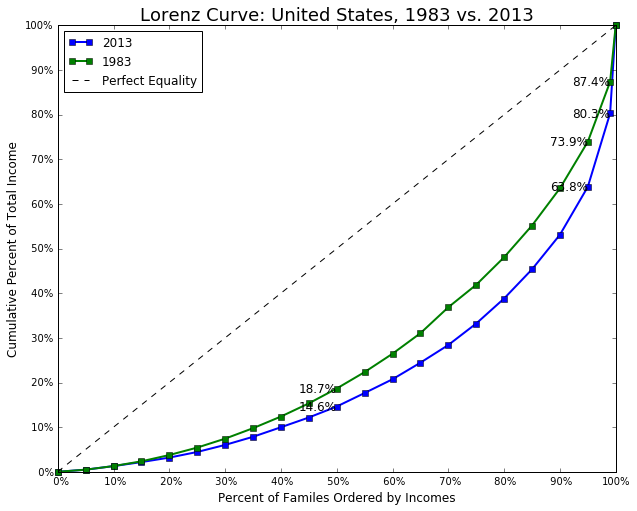

In [4]:
%pylab inline
import matplotlib.pyplot as plt                            

def figureprefs(data, variable = 'income', labels = False, legendlabels = []):
    
    percentiles = [i * 0.05 for i in range(20)]+[0.99, 1.00]

    fig, ax = plt.subplots(figsize=(10,8));

    ax.set_xticks([i*0.1 for i in range(11)]);       #Sets the tick marks
    ax.set_yticks([i*0.1 for i in range(11)]);

    vals = ax.get_yticks()                           #Labels the tick marks
    ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals]);
    ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

    ax.set_title('Lorenz Curve: United States, 1983 vs. 2013',  #Axes titles
                  fontsize=18, loc='center');
    ax.set_ylabel('Cumulative Percent of Total Income', fontsize = 12);
    ax.set_xlabel('Percent of Familes Ordered by Incomes', fontsize = 12);
    
    if type(data) == list:
        values = [weighted_percentiles(data[x], variable,
                    'wgt', dollar_amt = False, percentiles = percentiles) for x in range(len(data))]
        for index in range(len(data)):
            plt.plot(percentiles,values[index],
                     linewidth=2.0, marker = 's',clip_on=False,label=legendlabels[index]);
            for num in [10, 19, 20]:
                ax.annotate('{:3.1f}%'.format(values[index][num]*100), 
                    xy=(percentiles[num], values[index][num]),
                    ha = 'right', va = 'center', fontsize = 12);

    else:
        values = weighted_percentiles(data, variable,
                    'wgt', dollar_amt = False, percentiles = percentiles)
        plt.plot(percentiles,values,
                     linewidth=2.0, marker = 's',clip_on=False,label=legendlabels);

    plt.plot(percentiles,percentiles, linestyle =  '--', color='k',
            label='Perfect Equality');
   
    legend(loc = 2)

    

years_graph = [df2013, df1983]
labels = ['2013', '1983']

figureprefs(years_graph, variable = 'income', legendlabels = labels);


# Is the distribution of income in the U.S. becoming more or less equal?

It's clear from the graph above that the distribution of income in the U.S. has become more unequal since 1983. This is reflected by the fact that the Lorenz curve has clearly shifted to the right. The top 1% of earners increased their share from 12.6% (100%-80.3%) of total income in 1983 to 19.7% in 2013. The top 5% increased their share from 26% in 1983 to 36.2% in 2013.

We try to illustrate which income percentile groups become worse-off or better-off below. The graph we produce below plots average annual (real) income growth between 1983 and 2013 against income percentile. 

To see what's going on here, consider the following: a family in the 50th percentile made \$46,075 per year in 1983 (in 2013 dollars) while in 2013 a family in the 50th percentile earned \$46,668 per year (again in 2013 dollars). The real growth in income for a family in the 50th percentile was therefore just 1.29% (0.046% per year on average). A family in the 90th percentile, however, saw their income increase a whopping 70.23% (2.40% per year on average) in real terms. This definitely makes it seem like higher income families have fared relatively better over the past 31 years than lower, or average income families.


//anaconda/lib/python3.5/site-packages/pandas/io/wb.py:19: FutureWarning: 
The pandas.io.wb module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


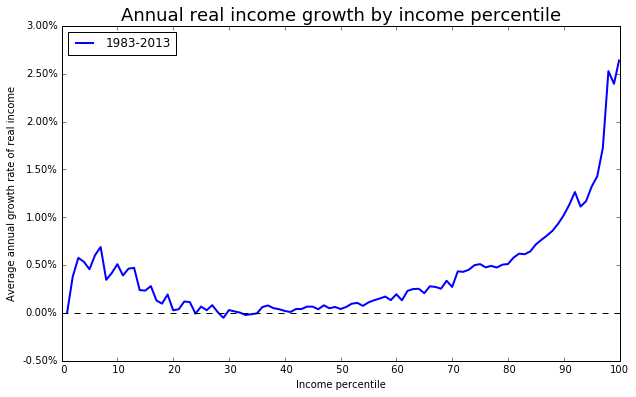

In [5]:

"""
Note: All Summary Extract data for survey years 1989 and later have been adjusted for inflation
(2013=100). This isn't the case for survey data prior to 1989, so we'll have to adjust the 1983 
data manually.
"""

from pandas.io import wb                                            # World Bank api

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)  #Ignore these two lines


cpi = wb.download(indicator='FP.CPI.TOTL' , country= 'USA', start=1983, end=2013)  #CPI

"""
The World Bank CPI series is indexed so that 2010 = 100. We'll have to re-index it so that 2013 = 100
to be consistent with the other data.
"""
cpi1983 = (100/cpi['FP.CPI.TOTL'][2013-2013])*cpi['FP.CPI.TOTL'][2013-1983]/100
df1983['realincome'] = df1983['income']/cpi1983



percentiles = [i * 0.01 for i in range(1,100)]+[0.99]+[0.999]

incomes = pd.DataFrame({'2001': weighted_percentiles(df2001, 'income', 'wgt', dollar_amt = True, percentiles =percentiles),
'2013': weighted_percentiles(df2013, 'income', 'wgt', dollar_amt = True, percentiles = percentiles),
'1992': weighted_percentiles(df1992, 'income', 'wgt', dollar_amt = True, percentiles = percentiles),
'1983': weighted_percentiles(df1983, 'realincome', "wgt", dollar_amt = True, percentiles = percentiles)})

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(percentiles,(incomes['2013']-incomes['1983'])/incomes['1983']/(2013-1983+1),
         linewidth = 2.0, label = '1983-2013');
yvals = ax.get_yticks()
ax.set_xticks([i * 0.1 for i in range(11)])
xvals = ax.get_xticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in yvals]);
ax.set_xticklabels(['{:3.0f}'.format(x*100) for x in xvals]);
ax.set_title('Annual real income growth by income percentile',  #Axes titles
                  fontsize=18, loc='center');
ax.axhline(y=0,xmin = 0, xmax = 1, linestyle = '--', color = 'k');
ax.set_ylabel('Average annual growth rate of real income');
ax.set_xlabel('Income percentile');
legend(loc=2);


The figure above is pretty revealing, but the picture might be even more stark for the period 1992-2001, which corresponds roughly to President Clinton's two terms in office (or as close as we can get with the SCF, which is conducted every three years). 

This isn't to say that the other decades aren't interesting, but this timeframe seems to be one with the most rapid growth in top incomes.

Real income growth exploded for top earners in the 1990s. The top 1% of earners saw their income grow by 8.35% per year on average in real terms between 1992 and 2001. The top 0.1% faired even better, with average real income growth of 18.70%.

That being said, just about every income percentile saw better-than-average growth between 1992 and 2001. Median income (50th percentile) grew 2.15 per year on average in real terms, which is much better than the 0.046% per year average real income growth the same percentile group experienced over the period 1983-2013.


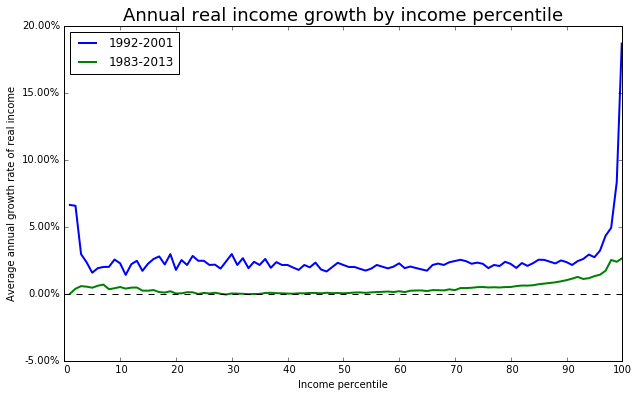

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(percentiles,(incomes['2001']-incomes['1992'])/incomes['1992']/(2001-1992+1),
         linewidth = 2.0, label = '1992-2001');
plt.plot(percentiles,(incomes['2013']-incomes['1983'])/incomes['1983']/(2013-1983+1),
         linewidth = 2.0, label = '1983-2013');
yvals = ax.get_yticks()
ax.set_xticks([i * 0.1 for i in range(11)])
xvals = ax.get_xticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in yvals]);
ax.set_xticklabels(['{:3.0f}'.format(x*100) for x in xvals]);
ax.set_title('Annual real income growth by income percentile',  #Axes titles
                  fontsize=18, loc='center');
ax.axhline(y=0,xmin = 0, xmax = 1, linestyle = '--', color = 'k');
ax.set_ylabel('Average annual growth rate of real income');
ax.set_xlabel('Income percentile');
legend(loc=2);